# Analisis Exploratorio

In [1]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train_labels = pd.read_csv('../data/train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('../data/train_values.csv', low_memory=False)

In [3]:
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento y limpieza de datos

In [5]:
df_buildings = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_buildings.set_index('building_id', inplace=True)
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_buildings.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Vemos que no tenemos ningún tipo de nulos en ninguna de los features. Además, podemos optimizar el uso de memoria en todos los features teniendo en cuenta su valor máximo y mínimo, o si son categóricos o no.

In [7]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   damage_grade                            260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-

### Conversion de tipos de datos

In [8]:
# Conversion de tipos de datos
to_categorical = set(df_buildings.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_buildings.columns if 'has' in col])
to_numeric = set(df_buildings.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_buildings[col] = df_buildings[col].astype('category')

for col in to_bool:
    df_buildings[col] = df_buildings[col].astype('bool')

for col in to_numeric:
    df_buildings[col] = pd.to_numeric(df_buildings[col], downcast='unsigned')


In [9]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

### Analisis de columna has_secondary_use

Algo que llama la atención es la columna *has_secondary_use*, que puede ser redundante teniendo en cuenta que además existen columnas de tipo especifico de
secondary use.

In [10]:
secondary_use = set([col for col in df_buildings.columns if 'has_secondary' in col])
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].shape[0]

231445

In [11]:
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

Vemos que de los 231.445 edificios que no tienen un uso secundario, tampoco tiene un uso secundario especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* resulta redundante.

Ahora, vamos a analizar para los casos que SI tienen un uso secundario.

In [12]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].shape[0]

29156

In [13]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].drop(columns='has_secondary_use').sum().sum()

29713

Podemos apreciar que de los 29.156 edificios que tienen un uso secundario, tenemos 29.713 usos secundarios en total. Esta diferencia de 557 puede venir de que algunos edificios tengan más de un uso secundario especifico.

In [14]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]

In [15]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]
aux['sum_has_secondary_use'] = aux.sum(axis=1)
aux.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_has_secondary_use
building_id,,,,,,,,,,,
333020,True,False,False,False,False,False,False,False,False,False,1
793397,True,False,False,False,False,False,False,False,False,False,1
973909,True,False,False,False,False,False,False,False,False,False,1
440102,False,False,True,False,False,False,False,False,False,False,1
552720,True,False,False,False,False,False,False,False,False,False,1


In [16]:
aux.loc[aux['sum_has_secondary_use'] > 1, :].shape[0]

557

Finalmente, vemos que efectivamente, la diferencia hallada provenia de aquellos edificios que tienen mas de un uso especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* tambien resulta redundante.

Podemos eliminar dicha feature ya que no nos aporta nada.

In [17]:
df_buildings.drop('has_secondary_use', axis=1, inplace=True)

In [18]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

## Analisis por estructura de edificios

Comenzamos por un analisis cuantitativo, queremos ver que con qué material fueron construidos los edificios. Buscaremos analizar si dichos materiales tuvieron o no incidencia en el nivel de daño recibido.

In [19]:
has_superstructure = set([col for col in df_buildings.columns if 'has_superstructure' in col])
only_superstructure = df_buildings.loc[:, has_superstructure]
only_superstructure.head()

,has_superstructure_cement_mortar_stone,has_superstructure_rc_non_engineered,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_timber,has_superstructure_rc_engineered,has_superstructure_other,has_superstructure_mud_mortar_brick,has_superstructure_stone_flag,has_superstructure_bamboo,has_superstructure_cement_mortar_brick
building_id,,,,,,,,,,,
802906,False,False,True,True,False,False,False,False,False,False,False
28830,False,False,False,True,False,False,False,False,False,False,False
94947,False,False,False,True,False,False,False,False,False,False,False
590882,False,False,False,True,True,False,False,False,False,True,False
201944,False,False,True,False,False,False,False,False,False,False,False


In [20]:
only_superstructure['cant_materiales'] = only_superstructure.sum(axis=1, numeric_only=True)

In [21]:
only_superstructure.head()

,has_superstructure_cement_mortar_stone,has_superstructure_rc_non_engineered,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_timber,has_superstructure_rc_engineered,has_superstructure_other,has_superstructure_mud_mortar_brick,has_superstructure_stone_flag,has_superstructure_bamboo,has_superstructure_cement_mortar_brick,cant_materiales
building_id,,,,,,,,,,,,
802906,False,False,True,True,False,False,False,False,False,False,False,2
28830,False,False,False,True,False,False,False,False,False,False,False,1
94947,False,False,False,True,False,False,False,False,False,False,False,1
590882,False,False,False,True,True,False,False,False,False,True,False,3
201944,False,False,True,False,False,False,False,False,False,False,False,1


In [22]:
cantidad_por_estructura = only_superstructure[has_superstructure].sum().sort_values(ascending=False)
cantidad_por_estructura = cantidad_por_estructura.rename(lambda x: x.replace('has_superstructure_', ''))
cantidad_por_estructura

mud_mortar_stone       198561
timber                  66450
adobe_mud               23101
bamboo                  22154
cement_mortar_brick     19615
mud_mortar_brick        17761
rc_non_engineered       11099
stone_flag               8947
cement_mortar_stone      4752
rc_engineered            4133
other                    3905
dtype: int64

In [23]:
cantidad_por_estructura.sum()

380478

In [24]:
# Ojo aca!, divido por la cantidad total de viviendas para saber el % sobre ese espacio.
# Es decir, 76% es sobre el total de viviendas, 25% es sobre el total de viviendas... y la suma de todos los porcentajes es mayor al 100%
# debido a que estas estructuras NO son excluyentes --> una vivienda puede tener mas de una estructura
cantidad_por_estructura / df_buildings.shape[0]

mud_mortar_stone                      0.76
timber                                0.25
adobe_mud                             0.09
bamboo                                0.09
cement_mortar_brick                   0.08
mud_mortar_brick                      0.07
rc_non_engineered                     0.04
stone_flag                            0.03
cement_mortar_stone                   0.02
rc_engineered                         0.02
other                                 0.01
dtype: float64

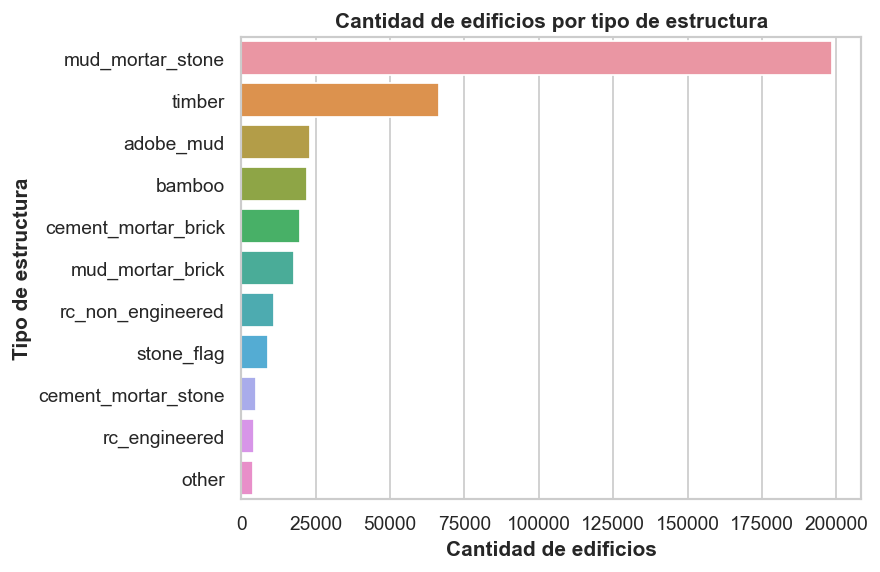

In [25]:
plt.figure(dpi=125)
sns.barplot(y=cantidad_por_estructura.index, x=cantidad_por_estructura.values, orient='h')
plt.ylabel("Tipo de estructura", weight='bold')
plt.xlabel("Cantidad de edificios", weight='bold')
plt.title("Cantidad de edificios por tipo de estructura", weight='bold')
plt.show()

Podemos ver que la gran mayoria (76%) de las edificaciones totales utilizaron barro-piedra para su construccion, 25% fueron construidas con Timber (madera especifica para construccion) seguido de un 9% con adobe-barro y bamboo y un 8% con cemento-ladrillo. Estas categorias no son excluyentes, es decir, hay viviendas que fueron contruidas con barro-piedra y por ejemplo se utilizó timber para soporte interno. Todos estos datos tienen concordancia con lo que se ve de Nepal a nivel nacional, fuera del contexto del terremoto.

Como observacion, recien al final de la decada de 1970 se empezó a construir viviendas con concreto reforzado, y por eso las pocas que hay construidas son en su mayoría de concreto reforzado no diseñado.

A continuación, veremos si en estos 5 primeros tipos de materiales podemos hallar algún tipo de incidencia respecto del daño recibido, ya que son las edificaciones con mayor cantidad de datos.

In [26]:
only_superstructure['cant_materiales'].value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: cant_materiales, dtype: int64

In [27]:
cantidad_por_cantidad_de_materiales = only_superstructure['cant_materiales'].value_counts()
cantidad_por_cantidad_de_materiales = 100 * cantidad_por_cantidad_de_materiales / cantidad_por_cantidad_de_materiales.sum()
cantidad_por_cantidad_de_materiales

1                  67.54
2                  22.19
3                   7.76
4                   1.89
5                   0.48
6                   0.12
7                   0.01
8                   0.00
Name: cant_materiales, dtype: float64

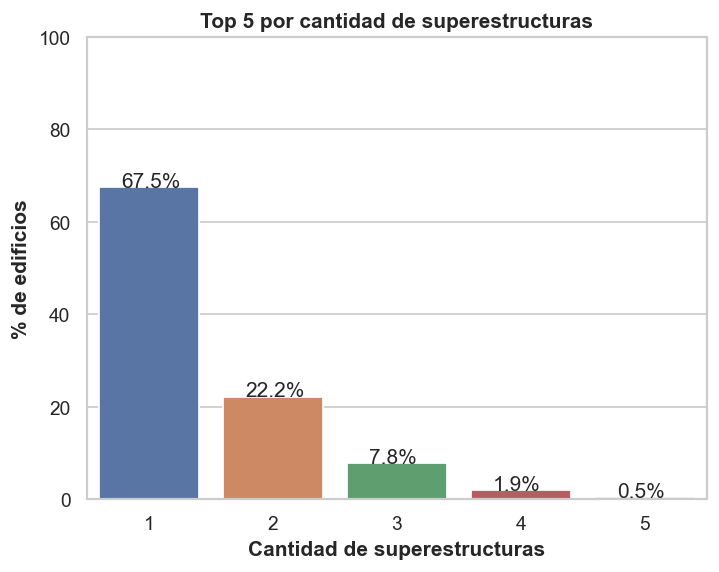

In [28]:
# Graficamos solo el top 5, haciendo el corte en > 1000 casos
plt.figure(dpi=125)
g = sns.barplot(x=cantidad_por_cantidad_de_materiales[:-3].index, y=cantidad_por_cantidad_de_materiales[:-3].values, orient='v')
g.set_ylim(0, 100)
for p in g.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.175
    pos_y = p.get_height()
    g.text(pos_x, pos_y, texto)
plt.ylabel("% de edificios", weight='bold')
plt.xlabel("Cantidad de superestructuras", weight='bold')
plt.title("Top 5 por cantidad de superestructuras", weight='bold')
plt.show(g)

### ¿A mayor cantidad de superestructuras utilizadas, menor es el daño recibido?

In [29]:
cant_materiales_y_danio = only_superstructure.merge(df_buildings, how='inner', on='building_id').loc[:, ['cant_materiales', 'damage_grade']]

# Me quedo solo con aquellos casos de cant_materiales <= 5 para graficar
top_5_por_cant_materiales_y_danio = cant_materiales_y_danio.loc[cant_materiales_y_danio['cant_materiales'] <= 5, :]
top_5_por_cant_materiales_y_danio

,cant_materiales,damage_grade
building_id,,
802906,2,3
28830,1,2
94947,1,3
590882,3,2
201944,1,3
...,...,...
688636,1,2
669485,1,3
602512,1,3


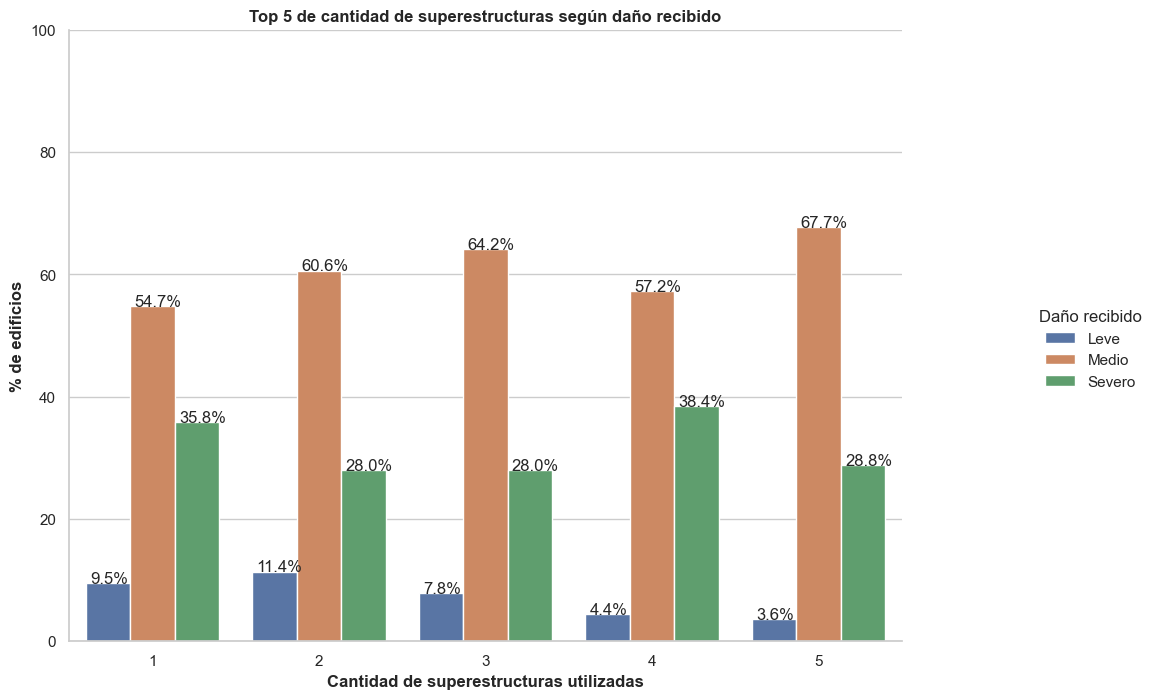

In [30]:
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio.groupby('cant_materiales')['damage_grade'].value_counts(normalize=True)
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio_pct.mul(100)
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio_pct.rename('porcentaje').reset_index()

g = sns.catplot(x='cant_materiales', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_por_cant_materiales_y_danio_pct)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(12, 7)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Cantidad de superestructuras utilizadas', weight='bold')
plt.title('Top 5 de cantidad de superestructuras según daño recibido', weight='bold')
plt.show(g)

Podemos apreciar que a medida que aumentan la cantidad de superestructuras utilizadas, aumenta parcialmente el porcentaje de edificios que sufrieron un daño medio. Esto se encuentra principalmente afectado por la cantidad de viviendas que sufrieron un grado de daño de nivel 2, que representan la mayoria del dataset.
Si nos centramos unicamente en los niveles 1-leve y 3-severo, tampoco podemos sacar mucha información ya que en algunos casos éstos aumentan o disminuyen para aumentar el porcentaje de viviendas que recibieron un daño medio.

En general, no podemos afirmar que a mayor cantidad de superestructuras utilizadas, menor es el daño recibido. Por lo tanto, vamos a realizar un analisis un poco mas profundo centrandonos en los tipos de superestructuras utilizados en las viviendas.

### ¿Cual fue el tipo de edificacion que se vio más afectada? ¿Cual fue la que menos fue afectada?

In [31]:
top_5_construcciones_utilizadas = cantidad_por_estructura[:5].index.tolist()
top_5_construcciones_utilizadas

['mud_mortar_stone', 'timber', 'adobe_mud', 'bamboo', 'cement_mortar_brick']

In [32]:
cols_necesarias = {'has_superstructure_mud_mortar_stone', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 'has_superstructure_bamboo',\
                  'has_superstructure_cement_mortar_brick'}
top_estructuras = df_buildings.loc[(df_buildings['has_superstructure_mud_mortar_stone'] == 1 )| (df_buildings['has_superstructure_timber'] == 1 )|\
                 (df_buildings['has_superstructure_adobe_mud'] == 1) | (df_buildings['has_superstructure_bamboo'] == 1) |\
                (df_buildings['has_superstructure_cement_mortar_brick']) == 1, cols_necesarias]
top_estructuras.columns = top_estructuras.columns.map(lambda x: x.replace('has_superstructure_', ''))
top_estructuras.head()

,adobe_mud,mud_mortar_stone,timber,bamboo,cement_mortar_brick
building_id,,,,,
802906,True,True,False,False,False
28830,False,True,False,False,False
94947,False,True,False,False,False
590882,False,True,True,True,False
201944,True,False,False,False,False


In [33]:
# Esto funciona pero tarda un poquito. La idea es obtener los 'has_superstructure_X' como categorias en una nueva columna
top_estructuras['superestructura'] = top_estructuras.apply(lambda x: '_and_'.join(x.index[x == 1]), axis=1)

In [34]:
top_estructuras['superestructura'].value_counts()

mud_mortar_stone                                                                143142
mud_mortar_stone_and_timber                                                      32517
cement_mortar_brick                                                              15031
mud_mortar_stone_and_timber_and_bamboo                                           12686
adobe_mud                                                                        11458
timber                                                                            7803
adobe_mud_and_mud_mortar_stone                                                    4653
timber_and_bamboo                                                                 4357
timber_and_cement_mortar_brick                                                    2121
adobe_mud_and_mud_mortar_stone_and_timber                                         2016
adobe_mud_and_timber                                                              1854
mud_mortar_stone_and_bamboo                

In [35]:
top_estructuras['superestructura'].value_counts(normalize=True)

mud_mortar_stone                                                                               0.59
mud_mortar_stone_and_timber                                                                    0.13
cement_mortar_brick                                                                            0.06
mud_mortar_stone_and_timber_and_bamboo                                                         0.05
adobe_mud                                                                                      0.05
timber                                                                                         0.03
adobe_mud_and_mud_mortar_stone                                                                 0.02
timber_and_bamboo                                                                              0.02
timber_and_cement_mortar_brick                                                                 0.01
adobe_mud_and_mud_mortar_stone_and_timber                                                      0.01


In [36]:
# Mergeo para recuperar damage_grade
cols_aux = set(top_estructuras.columns).union(set(['damage_grade']))
top_estructuras = top_estructuras.join(df_buildings, on='building_id', how='inner',).loc[:, cols_aux]

In [37]:
top_estructuras.head()

,bamboo,adobe_mud,superestructura,mud_mortar_stone,cement_mortar_brick,timber,damage_grade
building_id,,,,,,,
802906,False,True,adobe_mud_and_mud_mortar_stone,True,False,False,3
28830,False,False,mud_mortar_stone,True,False,False,2
94947,False,False,mud_mortar_stone,True,False,False,3
590882,True,False,mud_mortar_stone_and_timber_and_bamboo,True,False,True,2
201944,False,True,adobe_mud,False,False,False,3


#### Casos con mud_mortar_stone

In [38]:
# Selecciono solo los casos en donde tenga mud_mortar_stone
cantidad_por_tipo_y_danio_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_mud_stone / (cantidad_por_tipo_y_danio_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud_and_mud_mortar_stone,1,115,2.47
1,adobe_mud_and_mud_mortar_stone,2,2896,62.24
2,adobe_mud_and_mud_mortar_stone,3,1642,35.29
3,adobe_mud_and_mud_mortar_stone_and_bamboo,2,33,76.74
4,adobe_mud_and_mud_mortar_stone_and_bamboo,3,10,23.26


In [110]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]['superestructura'].value_counts()
aux

mud_mortar_stone                                                                143142
mud_mortar_stone_and_timber                                                      32517
mud_mortar_stone_and_timber_and_bamboo                                           12686
adobe_mud_and_mud_mortar_stone                                                    4653
adobe_mud_and_mud_mortar_stone_and_timber                                         2016
mud_mortar_stone_and_bamboo                                                       1266
adobe_mud_and_mud_mortar_stone_and_timber_and_bamboo                              1076
mud_mortar_stone_and_cement_mortar_brick                                           669
mud_mortar_stone_and_timber_and_cement_mortar_brick                                262
adobe_mud_and_mud_mortar_stone_and_cement_mortar_brick                              84
mud_mortar_stone_and_timber_and_bamboo_and_cement_mortar_brick                      83
adobe_mud_and_mud_mortar_stone_and_bamboo  

In [111]:
top_5_de_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_mud_stone = cantidad_por_tipo_y_danio_mud_stone.loc[cantidad_por_tipo_y_danio_mud_stone['superestructura'].isin(top_5_de_mud_stone), :]
top_5_estructuras_y_daño_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud_and_mud_mortar_stone,1,115,2.47
1,adobe_mud_and_mud_mortar_stone,2,2896,62.24
2,adobe_mud_and_mud_mortar_stone,3,1642,35.29
9,adobe_mud_and_mud_mortar_stone_and_timber,1,36,1.79
10,adobe_mud_and_mud_mortar_stone_and_timber,2,1151,57.09


In [112]:
top_5_estructuras_y_daño_mud_stone['superestructura'].unique()

array(['adobe_mud_and_mud_mortar_stone',
       'adobe_mud_and_mud_mortar_stone_and_timber', 'mud_mortar_stone',
       'mud_mortar_stone_and_timber',
       'mud_mortar_stone_and_timber_and_bamboo'], dtype=object)

In [113]:
# Cambio los nombres para poder plottear bien y que los nombres no se superpongan
top_5_estructuras_y_daño_mud_stone['superestructura'].replace({'mud_mortar_stone': 'solo_barro_piedra', 'mud_mortar_stone_and_adobe_mud': 'con_adobe',\
                                                              'mud_mortar_stone_and_adobe_mud_and_timber': 'con_adobe_y_timber',\
                                                               'mud_mortar_stone_and_timber_and_adobe_mud': 'con_adobe_y_timber',\
                                                              'mud_mortar_stone_and_timber': 'con_timber',\
                                                              'mud_mortar_stone_and_timber_and_bamboo': 'con_timber_y_bamboo',\
                                                              'bamboo_and_mud_mortar_stone_and_timber': 'con_timber_y_bamboo',\
                                                              'adobe_mud_and_mud_mortar_stone': 'con_adobe', \
                                                              'adobe_mud_and_mud_mortar_stone_and_timber': 'con_adobe_y_timber'}, inplace=True)

In [114]:
top_5_estructuras_y_daño_mud_stone['superestructura'].unique()

array(['con_adobe', 'con_adobe_y_timber', 'solo_barro_piedra',
       'con_timber', 'con_timber_y_bamboo'], dtype=object)

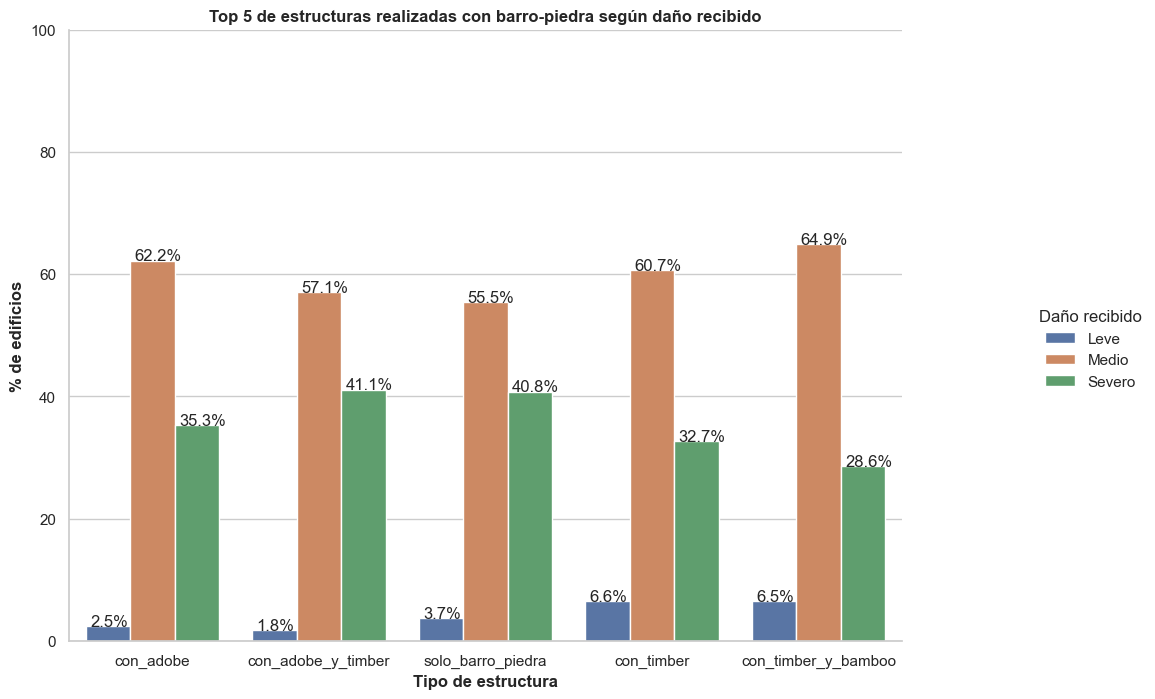

In [115]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_mud_stone, orient='v')
g.fig.set_size_inches(12, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras realizadas con barro-piedra según daño recibido", weight='bold')
plt.show(g)

Dentro del grupo de construcciones fabricadas con barro-piedra, podemos ver que aquellas estructuras construidas con solamente barro-piedra y aquellas con barro-piedra-adobe-timber fueron las más afectadas. Por otro lado, las construcciones que fueron fabricadas con timber son las que un poco menos daño severo y mayor daño leve recibieron. Esto tiene sentido ya que el timber es un material que suele ser resistente a daños sismicos si se usa como soporte interno. Sin embargo,  el caso de barro-piedra-adobe-timber nos puede indicar que el nivel de intensidad de los terremotos que afectaron a ese tipo de estructuras fueron lo suficientemente fuerte como para dañarlos, pese a tener una mayor cantidad de estructuras diversas.

En general, el uso de barro-piedra como combinacion principal de la vivienda no es sería lo aconsejado para este tipo de acontecimientos ya que presentan una pobre performance a la hora de reducir los daños catalogados como severos

#### Casos sin mud_mortar_stone

In [45]:
# Selecciono solo los casos en donde NO tenga mud_mortar_stone
cantidad_por_tipo_y_danio_sin_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_sin_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_sin_mud_stone / (cantidad_por_tipo_y_danio_sin_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_sin_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
3,adobe_mud_and_bamboo,1,7,7.07
4,adobe_mud_and_bamboo,2,53,53.54


In [46]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]['superestructura'].value_counts()
aux

cement_mortar_brick                                        15031
adobe_mud                                                  11458
timber                                                      7803
timber_and_bamboo                                           4357
timber_and_cement_mortar_brick                              2121
adobe_mud_and_timber                                        1854
bamboo                                                      1116
adobe_mud_and_timber_and_bamboo                              897
adobe_mud_and_cement_mortar_brick                            491
timber_and_bamboo_and_cement_mortar_brick                    353
adobe_mud_and_timber_and_cement_mortar_brick                 313
adobe_mud_and_bamboo                                          99
bamboo_and_cement_mortar_brick                                76
adobe_mud_and_timber_and_bamboo_and_cement_mortar_brick       65
adobe_mud_and_bamboo_and_cement_mortar_brick                   3
Name: superestructura, dt

In [47]:
top_5_sin_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_sin_mud_stone = cantidad_por_tipo_y_danio_sin_mud_stone.loc[cantidad_por_tipo_y_danio_sin_mud_stone['superestructura'].isin(top_5_sin_mud_stone), :]
top_5_estructuras_y_daño_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
28,cement_mortar_brick,1,6152,40.93
29,cement_mortar_brick,2,8237,54.80


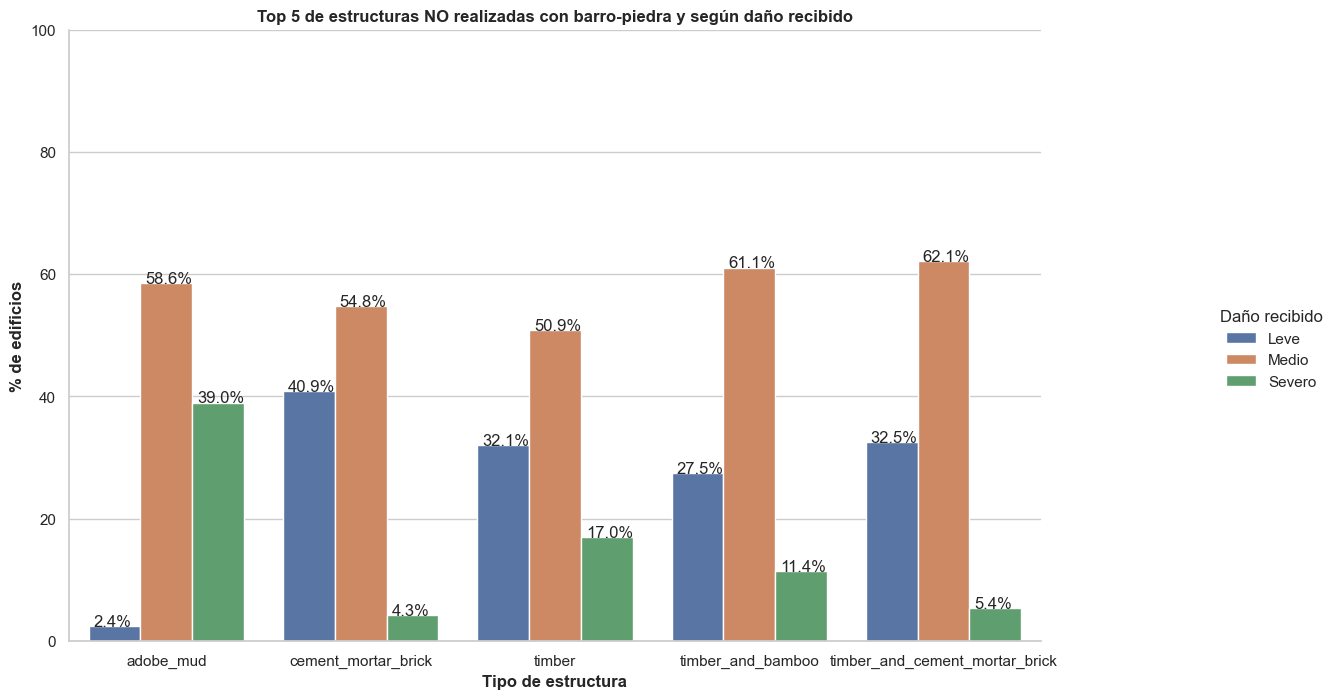

In [48]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_sin_mud_stone, orient='v')
g.fig.set_size_inches(14, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras NO realizadas con barro-piedra y según daño recibido", weight='bold')
plt.show(g)

Si dejamos afuera a las viviendas de barro-piedra, vemos una vez mas que el timber es uno de los materiales importantes a la hora de reducir los daños recibidos. Al mismo tiempo, se observa que el cemento-ladrillo es muchisimo mejor que barro-piedra, siendo este ultimo mas propicio a recibir peores daños. Esto puede deberse a que, independientemente de la diferencia entre materiales ladrillo-piedra, el barro es una pésima sustancia para usarla como mortero a la hora de unir materiales. Por otro lado, se ve que adobe-barro tiene un comportamiento similar a barro-piedra en cuanto a los 3 niveles de daños comparados. 

Es de suma importancia aclarar que, en funcion a la cantidad de datos registrados, se dejo de lado en esta comparacion a 3 tipos de edificaciones que, a priori, serían las viviendas más y menos resistentes daños sismico. Los 3 tipos mencionados se compararan a continuacion.

#### Casos de concreto reforzado no-diseñado/diseñado y viviendas basadas en piedra

In [49]:
# Que pasa si comparamos aquellas con concreto reforzado no-diseñado/diseñado y con viviendas construidas con piedras?
for_comparison = ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_stone_flag']
edificios_con_stone_y_rc = df_buildings.loc[(df_buildings['has_superstructure_stone_flag'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_engineered'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_non_engineered'] == 1), for_comparison]

In [50]:
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc.idxmax(axis=1)
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc['superestructura'].map(lambda x: x.replace('has_superstructure_', ''))
edificios_con_stone_y_rc = edificios_con_stone_y_rc.join(df_buildings.loc[:, ['damage_grade']], how='inner', on='building_id')
edificios_con_stone_y_rc.head()

,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_stone_flag,superestructura,damage_grade
building_id,,,,,
605134,False,False,True,stone_flag,3
306024,False,False,True,stone_flag,2
440102,True,False,False,rc_non_engineered,1
877361,False,False,True,stone_flag,2
288541,False,True,False,rc_engineered,1


In [51]:
agrupado_por_daño_y_estructura = edificios_con_stone_y_rc.groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
agrupado_por_daño_y_estructura['porcentaje'] = (agrupado_por_daño_y_estructura / (agrupado_por_daño_y_estructura.groupby(level=0).transform("sum"))) * 100
agrupado_por_daño_y_estructura.reset_index(inplace=True)
agrupado_por_daño_y_estructura.head()

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55


In [52]:
agrupado_por_daño_y_estructura

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55
5,rc_non_engineered,3,1410,12.70
6,stone_flag,1,165,1.95
7,stone_flag,2,4232,49.93
8,stone_flag,3,4079,48.12


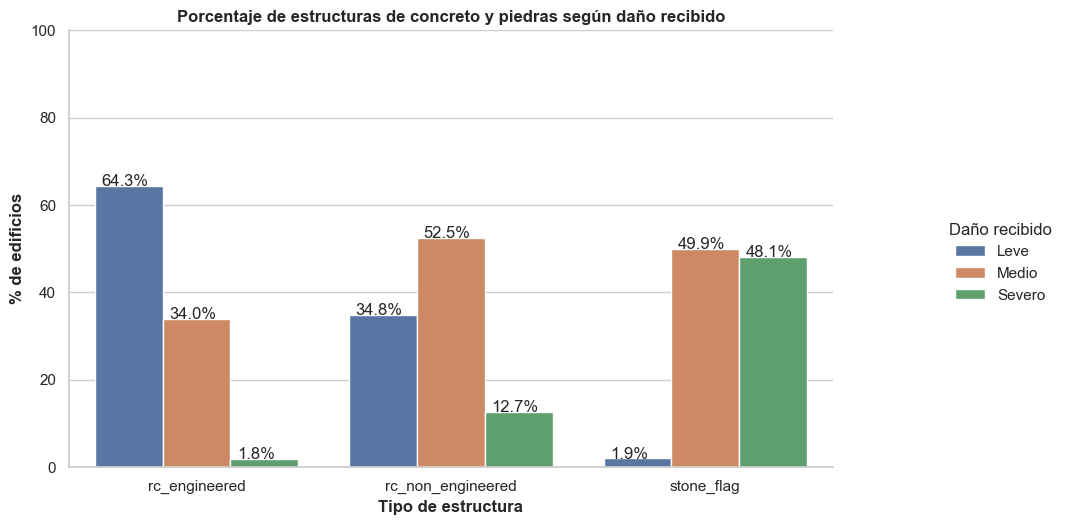

In [53]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=agrupado_por_daño_y_estructura, orient='v')
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
g.ax.set_ylim(0, 100)
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Porcentaje de estructuras de concreto y piedras según daño recibido", weight='bold')
plt.show(g)

Es evidente que dentro de este pequeño grupo, en concordancia con nuestra hipotesis, aquellas edificaciones con concreto reforzado diseñado son las que menos daños sufrieron mientras que aquellas fabricadas con solamente piedra fueron las que más daño recibieron. Esto es un claro indicio que un diseño estructural adecuado es la clave para reducir algun riesgo de daño proveniente de un terremoto

#### Comparación de morteros: caso de ejemplo cemento-ladrillo vs. barro-ladrillo

Ya vimos en los gráficos anteriores que cualquier combinación que presente a barro-piedra como sus principales materiales va a tener un rendimiento muy pobre a la hora de mitigar daños. Ahora bien, esta hipotesis puede deberse a que tanto el barro o la piedra sean materiales pocos propicios. Por lo tanto, vamos a comparar los casos que poseen cemento-ladrillo contra aquellos que tienen barro-ladrillo ya que ambas categorias tienen una cantidad de observaciones muy similar

In [143]:
con_cemento_o_barro_ladrillo = df_buildings.loc[(df_buildings['has_superstructure_cement_mortar_brick'] == 1) | (df_buildings['has_superstructure_mud_mortar_brick'] == 1),\
                 ['has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'damage_grade']]
con_cemento_o_barro_ladrillo.shape[0]

35508

In [144]:
con_cemento_y_barro_ladrillo = df_buildings.loc[(df_buildings['has_superstructure_cement_mortar_brick'] == 1) & (df_buildings['has_superstructure_mud_mortar_brick'] == 1),\
                 ['has_superstructure_cement_mortar_brick', 'has_superstructure_mud_mortar_brick', 'damage_grade']]
con_cemento_y_barro_ladrillo.shape[0]

1868

In [145]:
# Puedo sacar las filas que tienen ambos casos, no es un volumen importante.
result = con_cemento_o_barro_ladrillo[~con_cemento_o_barro_ladrillo.index.isin(con_cemento_y_barro_ladrillo.index)]
result.shape[0]

33640

In [146]:
result['has_superstructure_cement_mortar_brick'] = result['has_superstructure_cement_mortar_brick'].replace({True: 'cement_mortar_brick', False:'mud_mortar_brick'})
result.drop(columns=['has_superstructure_mud_mortar_brick'], inplace=True)
result.columns = ['superestructura', 'damage_grade']
result.head()

In [149]:
por_superestructura_y_porcentaje = result.groupby('superestructura')['damage_grade'].value_counts(normalize=True)
por_superestructura_y_porcentaje = por_superestructura_y_porcentaje.mul(100)
por_superestructura_y_porcentaje = por_superestructura_y_porcentaje.rename('porcentaje').reset_index()
por_superestructura_y_porcentaje

,superestructura,damage_grade,porcentaje
0,cement_mortar_brick,2,55.92
1,cement_mortar_brick,1,39.43
2,cement_mortar_brick,3,4.65
3,mud_mortar_brick,2,64.19
4,mud_mortar_brick,3,32.57
5,mud_mortar_brick,1,3.24


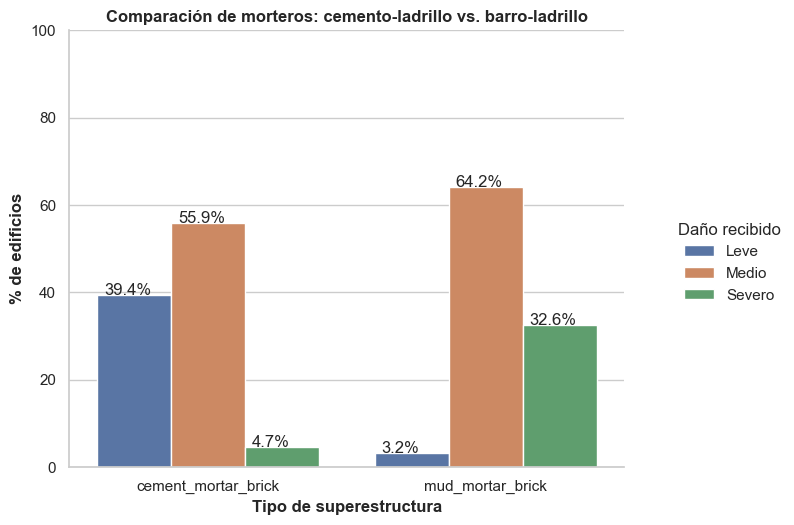

In [152]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=por_superestructura_y_porcentaje)
g.ax.set_ylim(0, 100)
g.fig.set_size_inches(8, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Tipo de superestructura', weight='bold')
plt.title('Comparación de morteros: cemento-ladrillo vs. barro-ladrillo', weight='bold')
plt.show(g)

Los resultados se encuentran a la vista, para un mismo material la variante mas importante es el tipo de mortero utilizado reduciendo en alrededor de un 28% la cantidad de edificios que recibieron daño severo, y disminuyendo alrededor de un 8% la cantidad de viviendas que recibieron un daño medio; aumentando un 36% los edificios que recibieron daño leve. Esta dato es muy importante teniendo en cuenta que la gran mayoria de viviendas de este dataset (y también a nivel nacional) presentan algún tipo de combinación que incluyen a barro-piedra.

### ¿Los edificios con menor antiguedad sufrieron menos daño?

In [54]:
bins = [0, 50, 100, 150, 300, 500, 600, 700, 800, 900, 950]
age_by_bins = df_buildings['age'].value_counts(bins=bins).to_frame()
age_by_bins = age_by_bins.reset_index().rename(columns={'index': 'rango_antiguedad', 'age':'cantidad'})
age_by_bins = age_by_bins.loc[age_by_bins['cantidad'] > 0]
age_by_bins

,rango_antiguedad,cantidad
0,"(-0.001, 50.0]",242457
1,"(50.0, 100.0]",16020
2,"(100.0, 150.0]",595
3,"(150.0, 300.0]",139


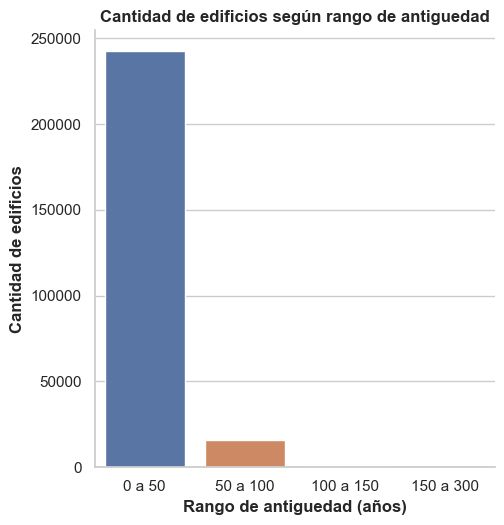

In [55]:
g = sns.catplot(x='rango_antiguedad', y='cantidad', kind='bar', data=age_by_bins, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel('Rango de antiguedad (años)', weight='bold')
plt.title("Cantidad de edificios según rango de antiguedad", weight='bold')
g.set_xticklabels(['0 a 50', '50 a 100', '100 a 150', '150 a 300'])
plt.show(g)

In [56]:
# Nos quedamos con los edificios con una antiguedad menor a 50 años para comparar debido a la poca cantidad de datos para age >= 50.
age_under_50 = df_buildings.loc[df_buildings['age'] <= 50, ['age', 'damage_grade']]
age_under_50 = age_under_50.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_under_50['porcentaje'] = (age_under_50 / (age_under_50.groupby(level=0).transform("sum"))) * 100
age_under_50.reset_index(inplace=True)

In [57]:
age_under_50.head()

,age,damage_grade,cantidad,porcentaje
0,0,1,7213,27.70
1,0,2,12721,48.85
2,0,3,6107,23.45
3,5,1,5590,16.59
4,5,2,19030,56.47


In [58]:
# Nos quedamos con los edificios con antiguedad mayor a 100 para ver que pasa
age_to_select = [100, 120, 150, 200, 995]
age_over_100 = df_buildings.loc[df_buildings['age'].isin(age_to_select), ['age', 'damage_grade']]
age_over_100 = age_over_100.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_over_100['porcentaje'] = (age_over_100 / (age_over_100.groupby(level=0).transform("sum"))) * 100
age_over_100.reset_index(inplace=True)

In [59]:
age_over_100

,age,damage_grade,cantidad,porcentaje
0,100,1,10,0.73
1,100,2,911,66.79
2,100,3,443,32.48
3,120,1,2,1.11
4,120,2,98,54.44
5,120,3,80,44.44
6,150,1,1,0.70
7,150,2,97,68.31
8,150,3,44,30.99
9,200,1,3,2.83


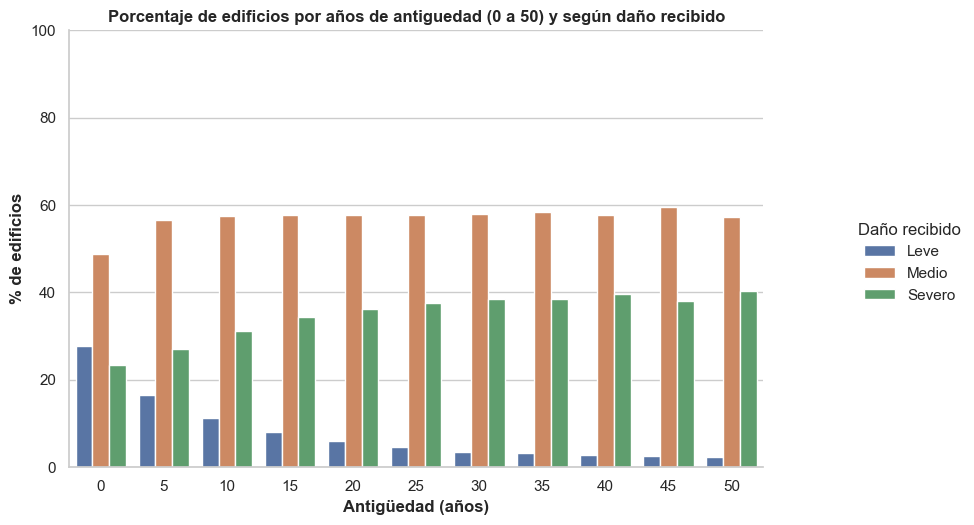

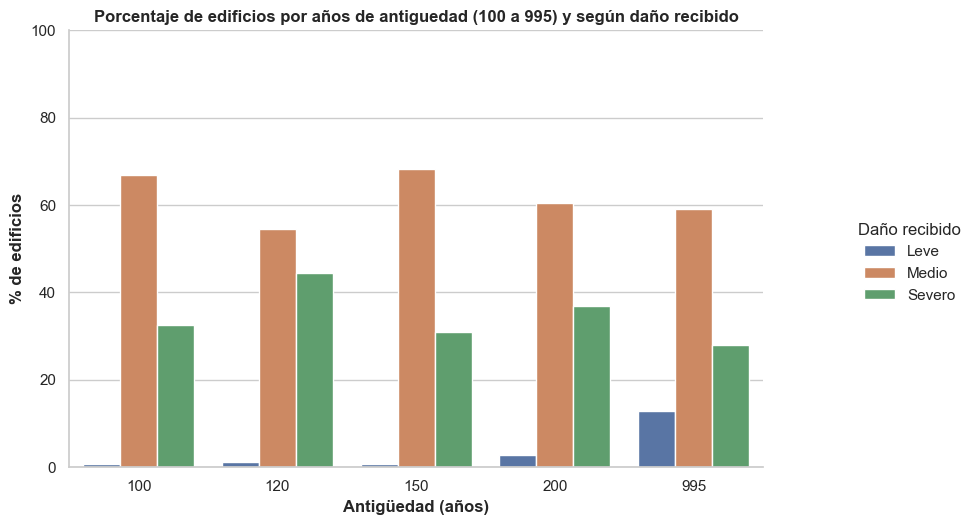

In [60]:
def plot_bar_pct(df, title):
    g = sns.catplot(x='age', y='porcentaje', hue='damage_grade', kind='bar', data=df, orient='v')
    g.fig.set_size_inches(10, 5)
    g._legend.set_title('Daño recibido')
    g.ax.set_ylim(0, 100)
    new_labels = ['Leve', 'Medio', 'Severo']
    for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
    plt.ylabel("% de edificios", weight='bold')
    plt.xlabel('Antigüedad (años)', weight='bold')
    plt.title(title, weight='bold')
    plt.show(g)

plot_bar_pct(age_under_50, "Porcentaje de edificios por años de antiguedad (0 a 50) y según daño recibido")
plot_bar_pct(age_over_100, "Porcentaje de edificios por años de antiguedad (100 a 995) y según daño recibido")

Para el rango de 0-50 años de antiguedad, se puede ver que arriba del 50% de los edificios sufrieron un grado de daño de nivel medio, mientras que un porcentaje mayor al 30% sufrieron daño severo. Es interesante observar como a medida que la antiguedad va aumentando, la cantidad de edificios que sufrieron daños leves va disminuyendo al mismo tiempo que la cantidad de viviendas que sufrieron un daño grave va aumentando. 

Si analizamos para aquellos edificios con una antiguedad mayor a 100, podemos ver que esta tendencia se sigue manteniendo. Sin embargo, aquellos edificios con una antiguedad de 995 años tienen un comportamiento similar a los edificios con antiguedad entre 0 y 10 años. Esto puede atribuirse a que dichos edificios pueden ser historicos con una constante remodelacion y/o reacondicionamiento con el fin de hacerlos mas resistentes a daños sismicos considerando que Nepal es una de las regiones sismicas mas activas del mundo. Al mismo tiempo, creemos que este grupo de 995 años agrupa tambien edificios para los cuales se desconocen su antiguedad pero que se cree que son bastante añejos.

En general, podemos decir que los edificios con menor antiguedad sufrieron menos daño severos.

#### Analizando un poco altura y area para los edificios con 995 años

In [61]:
df_buildings.loc[df_buildings['age'] == 995, :].shape[0]

1390

In [62]:
edificios_995_anios = df_buildings.loc[df_buildings['age'] == 995, :]
edificios_995_anios.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
435557,2,14,1120,3789,3,995,12,5,t,r,...,True,False,False,False,False,False,False,False,False,False
597626,1,26,39,1851,2,995,27,6,t,i,...,False,False,False,False,False,False,False,False,False,False
7560,3,26,1132,9472,2,995,8,5,t,r,...,False,False,False,False,False,False,False,False,False,False
797271,1,26,39,1851,2,995,14,6,t,u,...,False,False,False,False,False,False,False,False,False,False
857371,3,24,628,10750,2,995,10,5,t,r,...,False,False,False,False,False,False,False,False,False,False


In [63]:
edificios_995_anios['count_floors_pre_eq'].value_counts()

2    869
3    285
1    169
4     34
5     28
6      5
Name: count_floors_pre_eq, dtype: int64

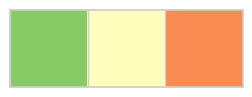

In [64]:
# Buenos colores para representar que '1' es algo bueno y '3' es muy malo para el contexto del dataset
sns.palplot(sns.color_palette("RdYlGn_r", 3))

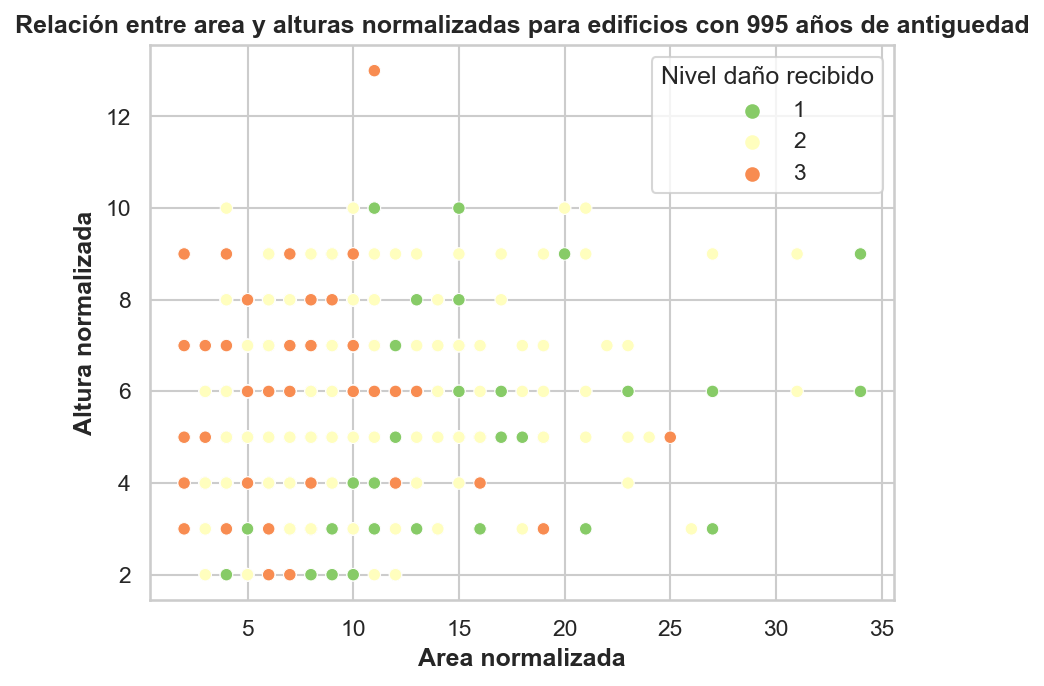

In [65]:
plt.figure(dpi=150)
sns.scatterplot(x='area_percentage', y='height_percentage', hue='damage_grade', \
                data=edificios_995_anios[edificios_995_anios['count_floors_pre_eq'] <= 3], palette=list(sns.color_palette("RdYlGn_r", 3)))
plt.legend(title="Nivel daño recibido")
plt.ylabel('Altura normalizada', weight='bold')
plt.xlabel("Area normalizada", weight='bold')
plt.title('Relación entre area y alturas normalizadas para edificios con 995 años de antiguedad', weight='bold')
plt.show()

Vemos que los edificios con antiguedad alrededor de 995 años que recibieron un daño severo (daño nivel 3) suelen tener un area normalizada menor a 15 y una altura normalizada menor a 10. A medida que la altura va aumentado, son escasos los edificios con un nivel de daño leve (daño nivel 1). Es decir, la altura tiene mas nivel de influencia que el area para estos edificos a la hora de entender que nivel de daño recibieron.

### ¿Los edificios con mayor cantidad de pisos sufrieron un mayor daño?

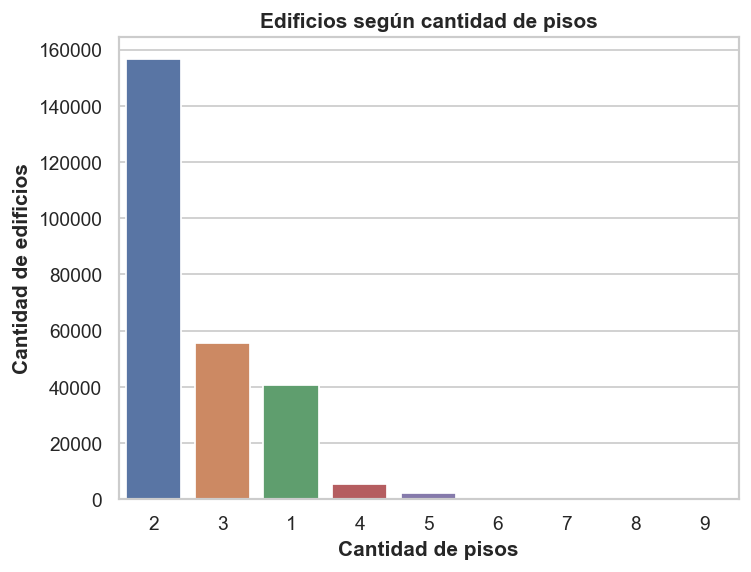

In [66]:
plt.figure(dpi=125)
sns.countplot(x='count_floors_pre_eq', data=df_buildings, order=df_buildings['count_floors_pre_eq'].value_counts()[:].index, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel("Cantidad de pisos", weight='bold')
plt.title("Edificios según cantidad de pisos", weight='bold')
plt.show()

In [67]:
cantidad_por_pisos_y_danio = df_buildings.loc[:, ['count_floors_pre_eq', 'damage_grade']]
cantidad_por_pisos_y_danio = cantidad_por_pisos_y_danio.groupby(['count_floors_pre_eq', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
cantidad_por_pisos_y_danio['porcentaje'] = (cantidad_por_pisos_y_danio / (cantidad_por_pisos_y_danio.groupby(level=0).transform("sum"))) * 100
cantidad_por_pisos_y_danio.reset_index(inplace=True)

In [68]:
cantidad_por_pisos_y_danio.head()

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
0,1,1,8969,22.18
1,1,2,20798,51.43
2,1,3,10674,26.39
3,2,1,12593,8.04
4,2,2,93968,60.00


In [69]:
# Solo analizamos por el top 3 de cantidad de pisos
top_3_cant_pisos = cantidad_por_pisos_y_danio['count_floors_pre_eq'].value_counts(normalize=True)[0:3].index.tolist()
top_3_cant_pisos = cantidad_por_pisos_y_danio.loc[cantidad_por_pisos_y_danio['count_floors_pre_eq'].isin(top_3_cant_pisos), :]
top_3_cant_pisos

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
0,1,1,8969,22.18
1,1,2,20798,51.43
2,1,3,10674,26.39
3,2,1,12593,8.04
4,2,2,93968,60.00
5,2,3,50062,31.96
6,3,1,2537,4.56
7,3,2,28479,51.21
8,3,3,24601,44.23


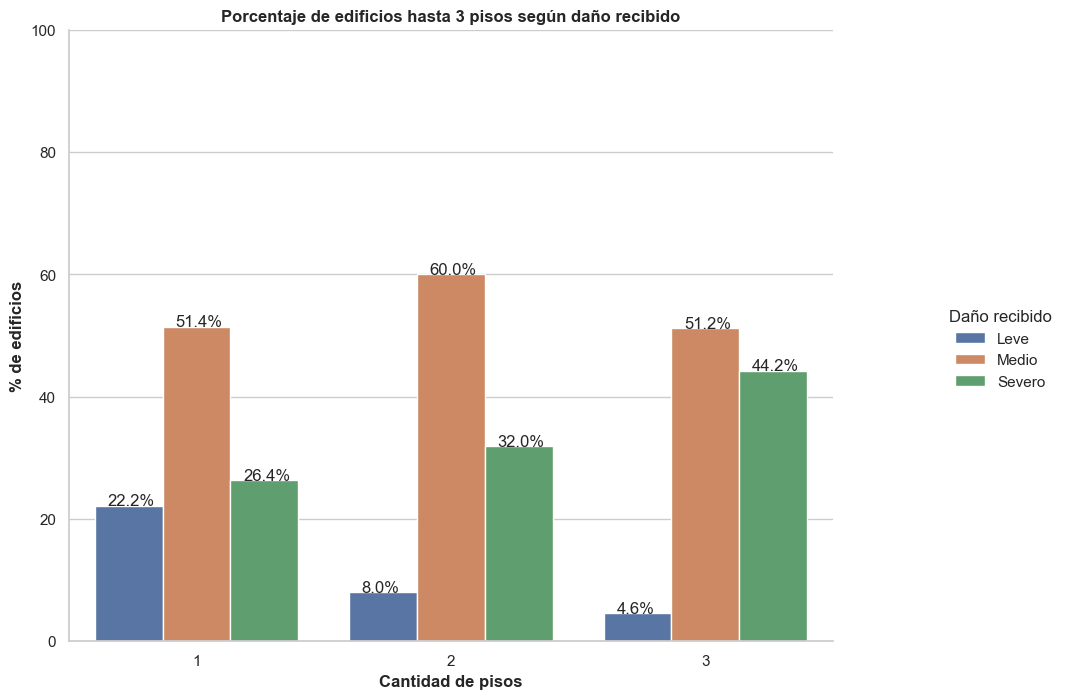

In [70]:
g = sns.catplot(x='count_floors_pre_eq', y='porcentaje', hue='damage_grade', kind='bar', data=top_3_cant_pisos, orient='v')
g.fig.set_size_inches(11, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.05
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Cantidad de pisos", weight='bold')
plt.title("Porcentaje de edificios hasta 3 pisos según daño recibido", weight='bold')
plt.show(g)

Si solo nos quedamos con las viviendas que tienen hasta 3 pisos, se observa claramente que a mayor cantidad de pisos, mayor fue el daño recibido. Es notable ver que la diferencia del 14% entre el porcentaje de edificios de 1 y 2 pisos proviene principalmente en la disminución del porcentaje de viviendas que sufrieron un daño leve, aumentando más el porcentaje de la cantidad de edificios que sufrieron un daño medio que los que sufrieron un daño severo. Mientras que en si comparamos las viviendas con 2 y 3 pisos, vemos que se disminuye tanto las viviendas con daño leve y medio para así aumentar en 12% aproximadamente las viviendas con daño severo.
Todo esto puede deberse a que dada las condiciones en que se construyen las viviendas en Nepal, y viendo que predominan las viviendas fabricadas, parcial o totalmente, con barro-piedra y fabricadas con timber; sumado a que probablemente no se cumplan las condiciones minimas necesarias para que dichas viviendas sean resistentes a un daño sismico, el aumento de pisos en una vivienda genera condiciones para que dicha vivienda sufra daños mayores.


#### ¿El plan de configuracion para diseño sismico ayudó a los edificios a recibir menos daño?

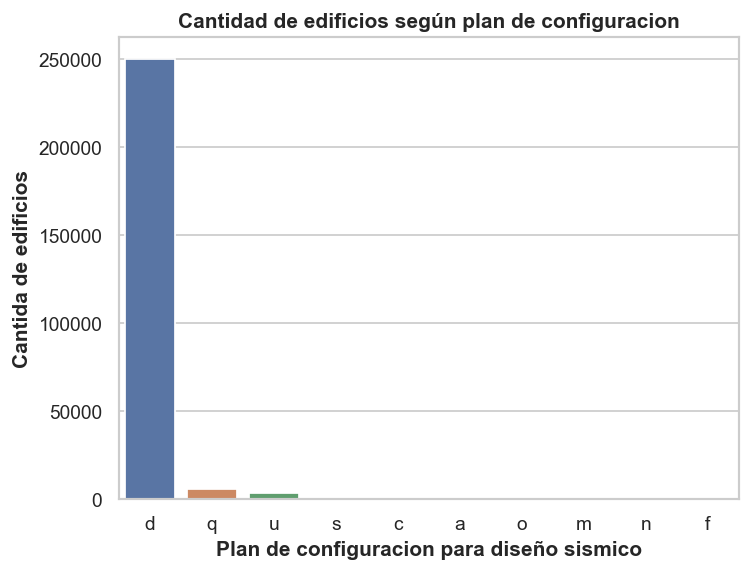

In [71]:
cuenta_por_plan_de_config = df_buildings['plan_configuration'].value_counts()
plt.figure(dpi=125)
sns.barplot(x=cuenta_por_plan_de_config.index, y=cuenta_por_plan_de_config.values, order=cuenta_por_plan_de_config[:].index, orient='v')
plt.ylabel('Cantida de edificios', weight='bold')
plt.xlabel('Plan de configuracion para diseño sismico', weight='bold')
plt.title('Cantidad de edificios según plan de configuracion', weight='bold')
plt.show()

Para la categoria de plan de configuracion para diseño sismico, el valor 'd' es la que gobierna el dataset abarcando casi la totalidad del mismo. Al mismo tiempo, los valores 'q' y 'u' tienen un poco menos de 5000 registros. Para el análisis que nos compete, nos quedamos con estas 3 valores para el conjunto de viviendas con 1-3 pisos.

In [72]:
solo_pisos_1_a_3 = df_buildings.loc[(df_buildings['count_floors_pre_eq'] >= 1) & (df_buildings['count_floors_pre_eq'] <= 3), :]
solo_pisos_1_a_3.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [73]:
cantidad_por_plan_configuracion = solo_pisos_1_a_3['plan_configuration'].value_counts()

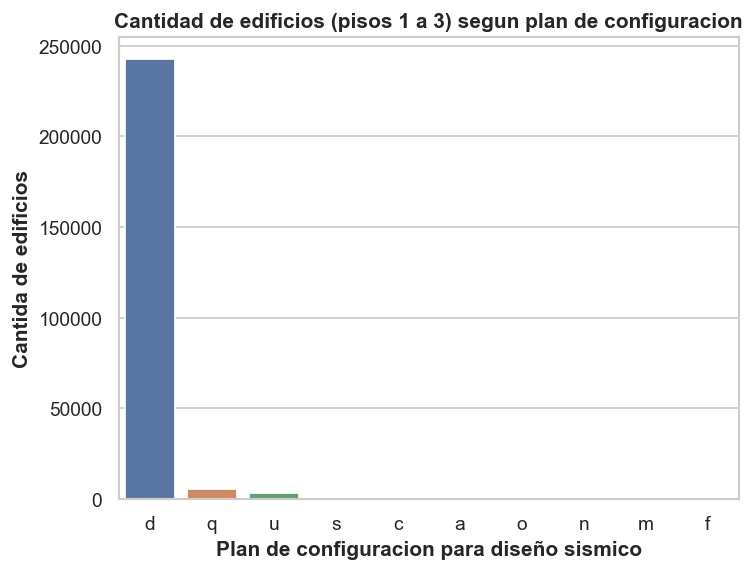

In [74]:
plt.figure(dpi=125)
sns.barplot(x=cantidad_por_plan_configuracion.index, y=cantidad_por_plan_configuracion.values, order=cantidad_por_plan_configuracion[:].index, orient='v')
plt.ylabel('Cantida de edificios', weight='bold')
plt.xlabel('Plan de configuracion para diseño sismico', weight='bold')
plt.title('Cantidad de edificios (pisos 1 a 3) segun plan de configuracion', weight='bold')
plt.show()

Como presuponiamos, para las viviendas con una cantidad de pisos entre 1 y 3, vemos una distribucion muy similar al grafico anterior dandonos como resultado que el plan de configuracion para diseño sismico que mas predomina es del tipo 'd'. Entendemos que esta categoria es aquella en donde las viviendas tienen nulo o muy poco diseño para resistir daños sismicos. Si nos quedamos con los valores 'd-q-u' dentro del conjunto de viviendas que tienen entre 1-3 pisos, vemos que

In [75]:
solo_pisos_1_a_3_con_plan_q_u_d = solo_pisos_1_a_3.loc[(solo_pisos_1_a_3['plan_configuration'] == 'q' ) | (solo_pisos_1_a_3['plan_configuration'] == 'u') |\
                                                     (solo_pisos_1_a_3['plan_configuration'] == 'd'),  :]
solo_pisos_1_a_3_con_plan_q_u_d.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [76]:
solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'] = solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'].cat.remove_unused_categories()
solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'].value_counts()

d    242681
q      5517
u      3410
Name: plan_configuration, dtype: int64

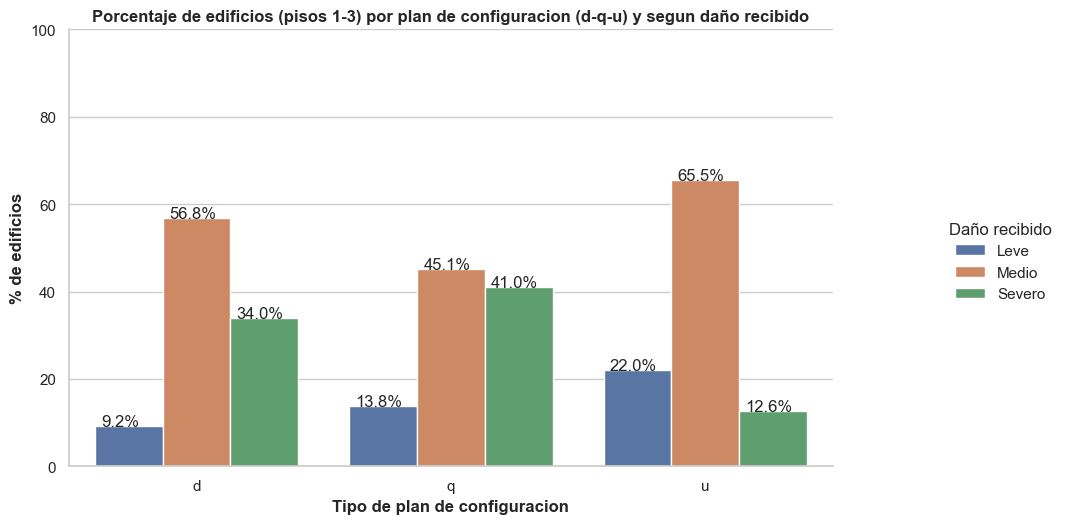

In [77]:
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d.groupby('plan_configuration')['damage_grade'].value_counts(normalize=True)
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d_pct.mul(100)
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d_pct.rename('porcentaje').reset_index()


g = sns.catplot(x="plan_configuration", y='porcentaje', hue='damage_grade', kind='bar', data=solo_pisos_1_a_3_con_plan_q_u_d_pct)
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
g.ax.set_ylim(0, 100)
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Tipo de plan de configuracion', weight='bold')
plt.title('Porcentaje de edificios (pisos 1-3) por plan de configuracion (d-q-u) y segun daño recibido', weight='bold')
plt.show(g)

Por cuestiones ya mencionadas, predomina el daño medio para estos planes de configuraciones. No obstante, si nos centramos unicamente en los daños leve y severo nos encontramos con la informacion que la categoria 'u' es aquella que tiene el mayor porcentaje de viviendas con daño leve y el menor porcentaje de viviendas con daño severo. Es probable que esta categoria sea aquella que nos indica que las viviendas tienen algun tipo de diseño para daños sismicos (mayor nivel que la categoria 'd')

#### Relación area y alturas normalizadas

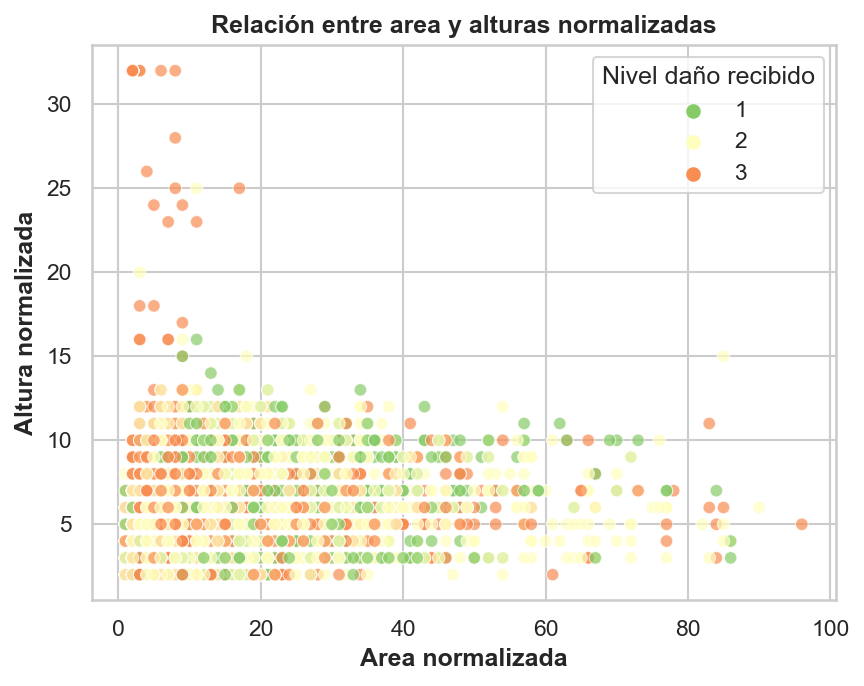

In [78]:
# Nos quedamos con los edificios con pisos <= 3 para plottear
plt.figure(dpi=150)
sns.scatterplot(x='area_percentage', y='height_percentage', hue='damage_grade', \
                data=df_buildings[(df_buildings['count_floors_pre_eq'] <= 3)], palette=list(sns.color_palette("RdYlGn_r", 3)), alpha=0.7)
plt.legend(title="Nivel daño recibido")
plt.ylabel('Altura normalizada', weight='bold')
plt.xlabel("Area normalizada", weight='bold')
plt.title('Relación entre area y alturas normalizadas', weight='bold')
plt.show()

## Analisis por concordancia de tipos de features

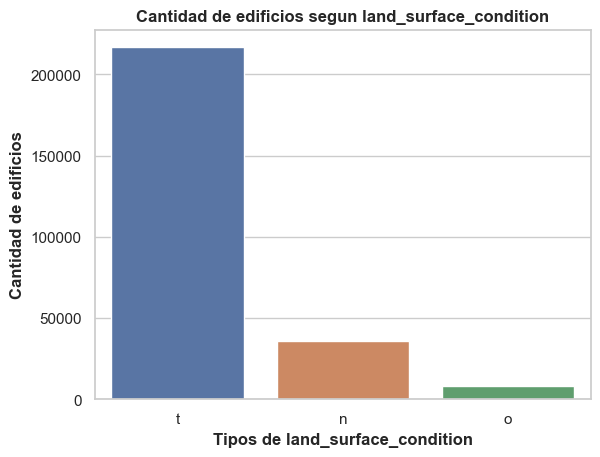

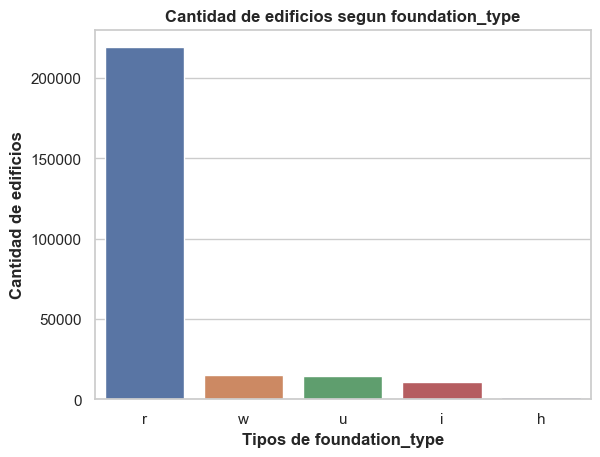

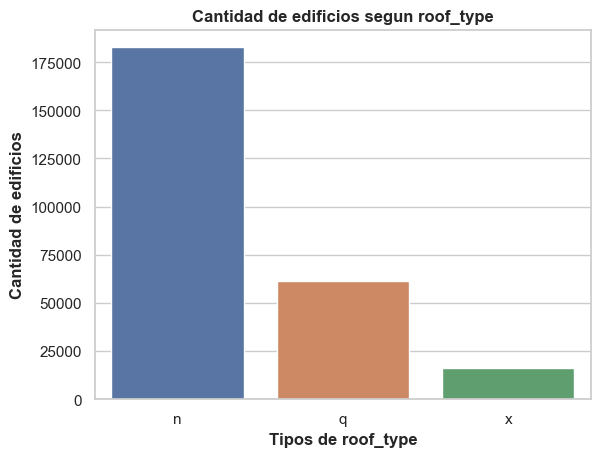

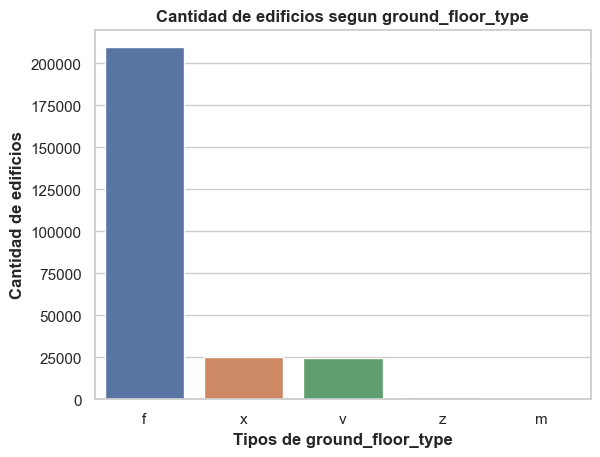

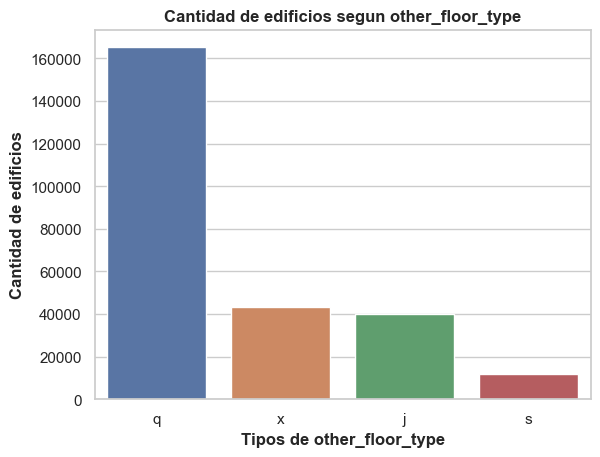

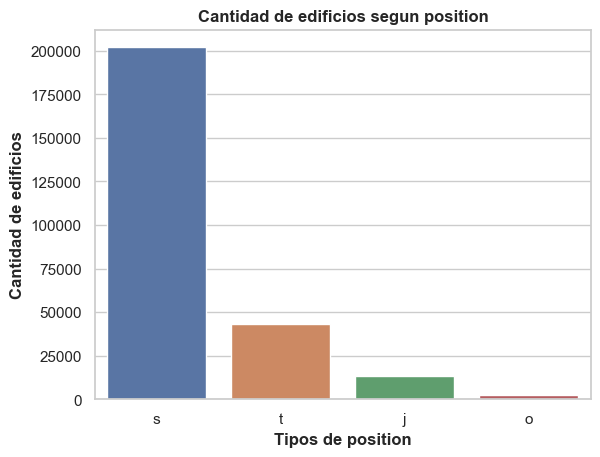

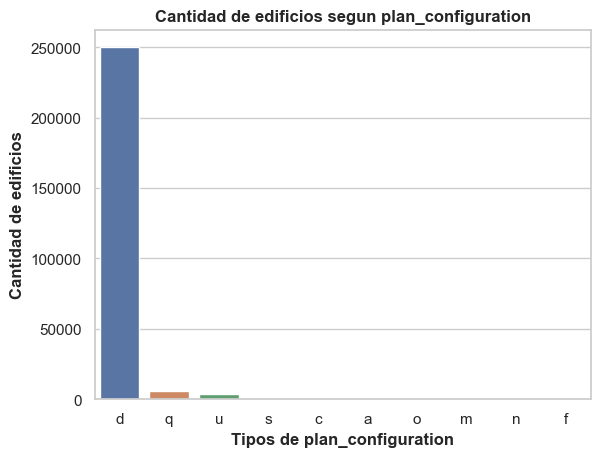

In [79]:
columnas = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration']
def fast_plot(df, column_name, title):
    plt.figure(dpi=100)
    g = sns.countplot(x=column_name, data=df, order=df[column_name].value_counts()[:].index, orient='v')
    plt.ylabel('Cantidad de edificios', weight='bold')
    plt.xlabel('Tipos de ' + title, weight='bold')
    plt.title('Cantidad de edificios segun ' + title, weight='bold')
    plt.show(g)
    
for col in columnas:
    fast_plot(df_buildings, col, col)

In [80]:
test = df_buildings.groupby(columnas).agg({'damage_grade':'count'}).reset_index().rename(columns={'damage_grade': 'cantidad'})

In [81]:
test.loc[test['cantidad'] > 4000]

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,cantidad
4862,n,r,n,f,q,s,d,10533
28822,t,r,n,f,j,s,d,12332
28862,t,r,n,f,q,s,d,64050
28872,t,r,n,f,q,t,d,14031
28942,t,r,n,f,x,s,d,14051
29342,t,r,n,x,q,s,d,5562
29662,t,r,q,f,q,s,d,23693
29672,t,r,q,f,q,t,d,5232
29742,t,r,q,f,x,s,d,4173


In [82]:
test.loc[test['cantidad'] > 4000].sum()

cantidad    153657
dtype: int64

## Analisis por orientacion del edificio

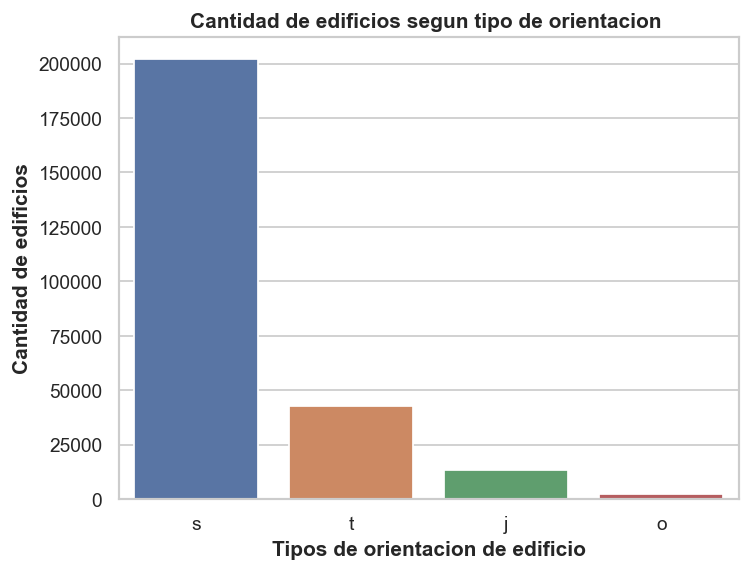

In [83]:
plt.figure(dpi=125)
g = sns.countplot(x='position', data=df_buildings, order=df_buildings['position'].value_counts()[:].index, orient='v')
plt.ylabel('Cantidad de edificios', weight='bold')
plt.xlabel('Tipos de orientacion de edificio', weight='bold')
plt.title('Cantidad de edificios segun tipo de orientacion ', weight='bold')
plt.show(g)

In [84]:
df_buildings['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

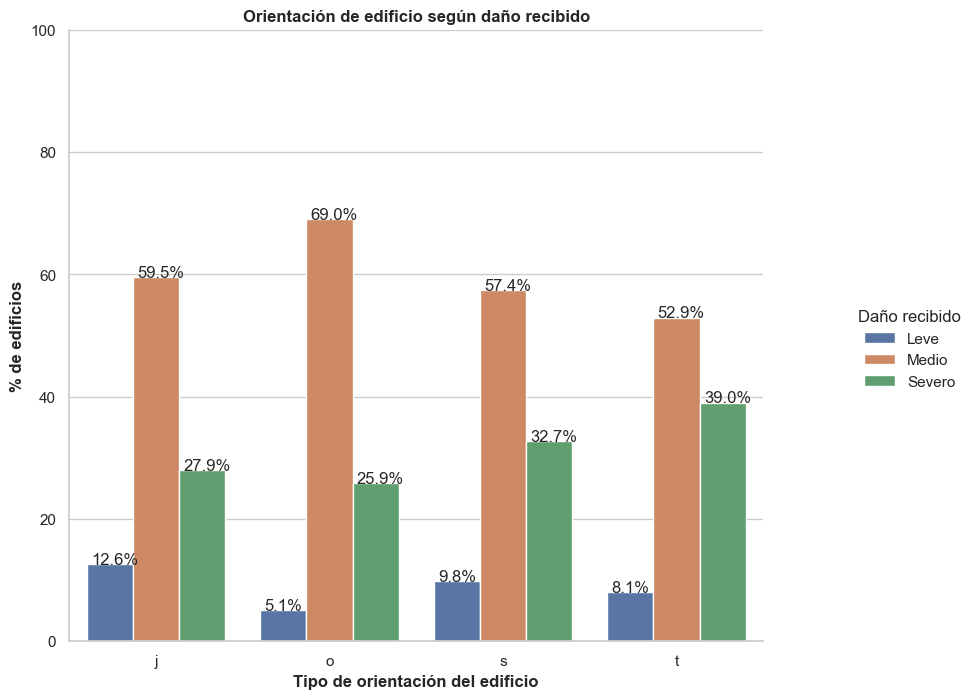

In [85]:
por_posicion_y_danio = df_buildings.groupby('position')['damage_grade'].value_counts(normalize=True)
por_posicion_y_danio = por_posicion_y_danio.mul(100)
por_posicion_y_danio = por_posicion_y_danio.rename('porcentaje').reset_index()

g = sns.catplot(x='position', y='porcentaje', hue='damage_grade', kind='bar', data=por_posicion_y_danio)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(10, 7)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Tipo de orientación del edificio', weight='bold')
plt.title('Orientación de edificio según daño recibido', weight='bold')
plt.show(g)

A priori, el tipo de orientacion que mejor actuó ante daños sismicos es el tipo 'j' ya que es el que tiene el mayor porcentaje de viviendas con daño leve y es el segundo con un porcentaje menor de edificios con un daño severo. Creemos que el tipo 'j' es aquel que indica que un edifico tiene una orientacion lo mas recta posible.
Por otro lado, el tipo 't' es una de las peores orientaciones con el mayor porcentaje de edificios que recibieron un daño severo. Este tipo de orientacion debe estar relacionada con que el edificio presenta una inclinacion bastante marcada, produciendo que al minimo movimiento del suelo se maximizen los daños recibidos. 

En el grafico anterior vimos que el tipo 's' es el que tiene mayor representacion en el dataset y puede ser que este tipo represente algun tipo de inclinacion pero no tan acentuada como el tipo 't'. La hipotesis se basa en que Nepal tiene una topografia compleja con poco terreno llano generando que las viviendas se construyan sobre lugares pocos propicios en condiciones normales; siendo mucho peor si le agregamos que es una zona con alta probabilidad de terremotos.